Ejercicio N°1
El dataset `winequality-red.csv` contiene un conjunto de variables relacionadas con propiedades fisicoquímicas que fueron determinadas sobre una serie de vinos de una misma variedad, así como un puntaje asignado en cada caso por un panel de enólogos en sesiones de cata. Importe el dataset al entorno de trabajo y realice cualquier tipo de limpieza y adecuación del mismo que considere necesaria para su posterior análisis.

1. Clasifique las variables del dataset en cualitativas, cuantitativas discretas y cuantitativas continuas.
2. El 25% de los vinos del dataset tiene un contenido de alcohol superior a… ¿qué valor?
3. Realice una tabla en la que se presenten, para las variables densidad y pH, únicamente las siguientes medidas descriptivas: media, mediana, desvío estándar y rango intercuartil. A continuación, responda a las siguientes preguntas sin realizar ningún gráfico:

  - ¿Cómo describiría ambas distribuciones en relación a sus características de simetría?

  - ¿Cuál de los dos conjuntos de observaciones (densidad o pH) presenta mayor variabilidad?

4. Represente la distribución de las observaciones de la variable contenido de alcohol (alcohol) a través de un boxplot. Sugerencia: utilice la función sns.boxplot() de la librería seaborn`. Basándose en el gráfico, ¿cuál de las siguientes medidas de posición o centralidad (media aritmética/mediana) le parece más adecuada para describir a esta variable?

5. Realice una tabla de frecuencias para resumir la distribución de los vinos del dataset en función del puntaje asignado según su calidad (quality).

  - ¿Cuál de los puntajes fue recibido por una mayor cantidad de vinos?

  - ¿Qué porcentaje de los vinos de la muestra recibieron la calificación más baja?

Son 13 columnas:

|Variable|Clasificación|
|---|---|
|1. fixed acidity|Cuantitativa continua|
2. volatile acidity|Cuantitativa continua|
3. citric acid|Cuantitativa continua|
4. residual sugar|Cuantitativa continua|
5. chlorides|Cuantitativa continua|
6. free sulfur dioxide|Cuantitativa continua|
7. total sulfur dioxide|Cuantitativa continua|
8. density|Cuantitativa continua|
9. pH|Cuantitativa continua|
10. sulphates|Cuantitativa continua|
12. alcohol|Cuantitativa continua|
13. quality|Cuantitativa Discreta|


In [ ]:
import pandas as pd
vinos = pd.read_csv("/content/winequality-red.csv")

In [ ]:
columnas = pd.Series(vinos.columns)
columnas

,0
0,fixed acidity
1,volatile acidity
2,citric acid
3,residual sugar
4,chlorides
5,free sulfur dioxide
6,total sulfur dioxide
7,density
8,pH
9,sulphates


2. El 25% de los vinos del dataset tiene un contenido de alcohol superior a… ¿qué valor?

In [ ]:
print("El 25% de los vinos tiene un contenido de alcohol superior a", vinos.alcohol.quantile(0.75))

El 25% de los vinos tiene un contenido de alcohol superior a 11.1


3. Realice una tabla en la que se presenten, para las variables densidad y pH, únicamente las siguientes medidas descriptivas: media, mediana, desvío estándar y rango intercuartil. A continuación, responda a las siguientes preguntas sin realizar ningún gráfico:

  - ¿Cómo describiría ambas distribuciones en relación a sus características de simetría?

  - ¿Cuál de los dos conjuntos de observaciones (densidad o pH) presenta mayor variabilidad?


  |medida|density|pH|
  |---|---|---|
  |media|||
  mediana|
  desvío estandar|
  rango intercuartil|

In [ ]:
medidas = pd.DataFrame({
    "Medida": ["Media",
               "Mediana",
               "Desvío Estándar",
               "Rango Intercuartil"],
    "density": [vinos["density"].mean(),
                vinos["density"].median(),
                vinos["density"].std(),
                vinos["density"].quantile(0.75) - vinos["density"].quantile(0.25)],
    "pH": [vinos["pH"].mean(),
           vinos["pH"].median(),
           vinos["pH"].std(),
           vinos["pH"].quantile(0.75) - vinos["pH"].quantile(0.25)]})
medidas

,Medida,density,pH
0,Media,0.996747,3.311113
1,Mediana,0.996750,3.310000
2,Desvío Estándar,0.001887,0.154386
3,Rango Intercuartil,0.002235,0.190000


  - ¿Cómo describiría ambas distribuciones en relación a sus características de simetría?

  - ¿Cuál de los dos conjuntos de observaciones (densidad o pH) presenta mayor variabilidad?

Respecto a la densidad, observamos que la media y la mediana son:
- Media = 0.9967466791744841
- Mediana 0.99675
- Diferencia = −0.00000332 (mínima, casi cero)

Como son bastantes parecidos podemos inferir que el conjunto de datos de pH tiene mucha simetría. La cual es negativa (media menor que la mediana)

Respecto al pH:
- Media = 3.3111131957473416
- Mediana = 3.31
Diferencia = +0.001113 (también muy pequeña)

Tiene mucha simetría pero menos que la variable densidad
El pH tiene mucha más variabilidad que la densidad.

In [ ]:
q1 = vinos['pH'].quantile(0.5) - vinos["pH"].quantile(0.25)
q2 = vinos['pH'].quantile(0.5) - vinos["pH"].quantile(0.75)
print(q1, q2)

0.10000000000000009 -0.08999999999999986


---

Visualizando la simetría de pH con distintos gráficos

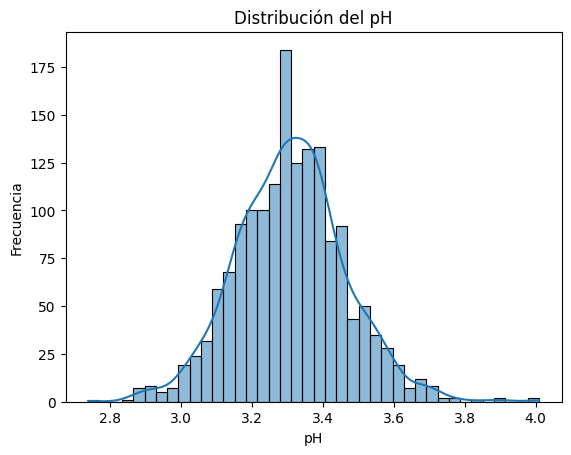

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(vinos["pH"], kde=True)
plt.title("Distribución del pH")
plt.xlabel("pH")
plt.ylabel("Frecuencia")
plt.show()


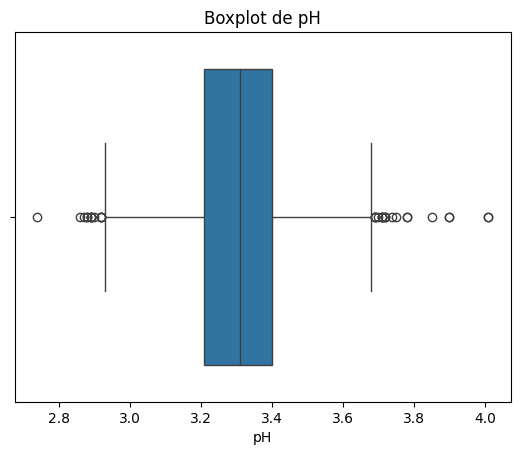

In [ ]:
sns.boxplot(x=vinos["pH"])
plt.title("Boxplot de pH")
plt.show()


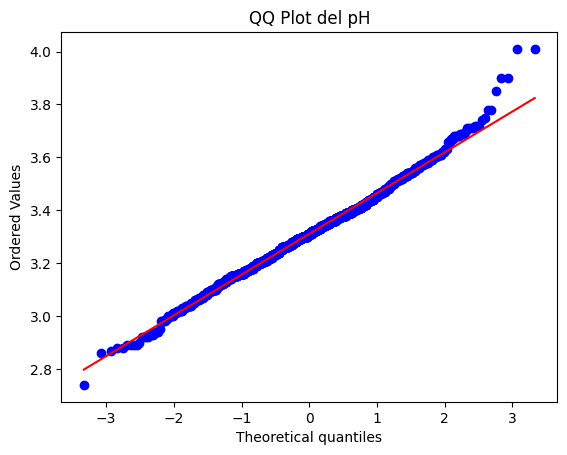

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(vinos["pH"], dist="norm", plot=plt)
plt.title("QQ Plot del pH")
plt.show()


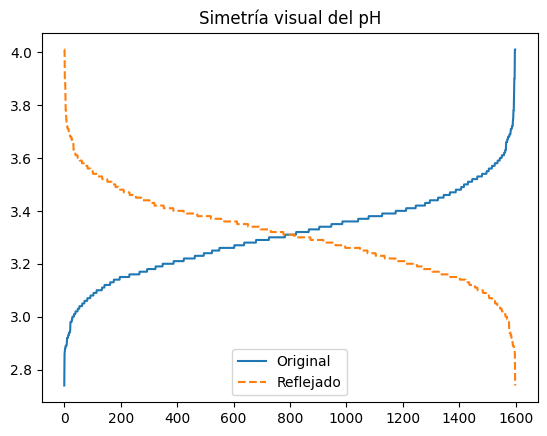

In [ ]:
import numpy as np

ph = vinos["pH"].dropna()
ph_sorted = np.sort(ph)
ph_flipped = ph_sorted[::-1]  # lo mismo pero al revés

plt.plot(ph_sorted, label="Original")
plt.plot(ph_flipped, label="Reflejado", linestyle="--")
plt.title("Simetría visual del pH")
plt.legend()
plt.show()

---

4. Represente la distribución de las observaciones de la variable contenido de alcohol (alcohol) a través de un boxplot. Sugerencia: utilice la función `sns.boxplot()` de la librería `seaborn`. Basándose en el gráfico, ¿cuál de las siguientes medidas de posición o centralidad (media aritmética/mediana) le parece más adecuada para describir a esta variable?

mediana:  10.2
media:  10.422983114446529


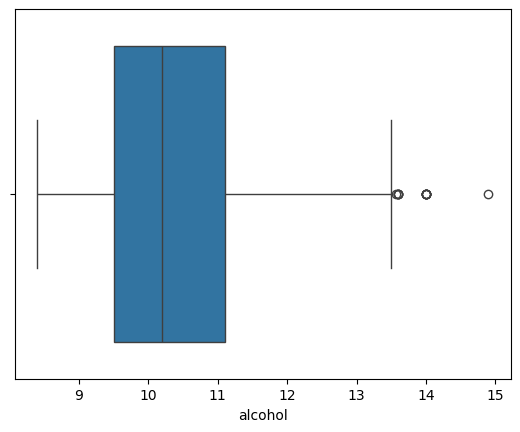

In [ ]:
import seaborn as sns

sns.boxplot(x=vinos["alcohol"])
print("mediana: ", vinos["alcohol"].median())
print("media: ",vinos["alcohol"].mean())

Dado que nos encontramos con outliers, la medida de centralidad más apropiada es la mediana. Por el mismo motivo, la medida de dispersión más adecuada podría ser la Dispersión mediana absoluta (MAD)

5. Realice una tabla de frecuencias para resumir la distribución de los vinos del dataset en función del puntaje asignado según su calidad (quality).

  - ¿Cuál de los puntajes fue recibido por una mayor cantidad de vinos?

  - ¿Qué porcentaje de los vinos de la muestra recibieron la calificación más baja?

In [ ]:
frecuencias = vinos["quality"].value_counts().sort_index()
# vinos["quality"].isna().sum()
# vinos["quality"].count()
frecuencias

,count
quality,
3,10
4,53
5,681
6,638
7,199
8,18


In [ ]:
tabla_frecuencias = pd.DataFrame({
    "Frecuencia Abs": vinos["quality"].value_counts().sort_index(),
    "Frecuencia Rel (%)": (vinos["quality"].value_counts(normalize=True).sort_index() * 100).round(2)
})
tabla_frecuencias
# Acceder al porcentaje para calidad 3
# porcentaje_3 = tabla_frecuencias.loc[3, "Frecuencia Relativa (%)"]
# print(f"Porcentaje de vinos con calidad 3: {porcentaje_3}%")

,Frecuencia Abs,Frecuencia Rel (%)
quality,,
3,10,0.63
4,53,3.31
5,681,42.59
6,638,39.90
7,199,12.45
8,18,1.13


- ¿Qué porcentaje de los vinos de la muestra recibieron la calificación más baja?



In [ ]:
calificacion_mas_baja = vinos['quality'].min()
print(f"La calificación más baja es {calificacion_mas_baja} y representa tan solo el {tabla_frecuencias.loc[calificacion_mas_baja, 'Frecuencia Rel (%)']}% del total de los vinos.")

La calificación más baja es 3 y representa tan solo el 0.63% del total de los vinos.
